# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd

,City
0,punta arenas
1,severo-yeniseyskiy
2,ilulissat
3,clyde river
4,sao jose da coroa grande
...,...
610,hunsur
611,kangaatsiaq
612,tiarei
613,oranjemund


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

total_data = cities_pd
total_data['Cloudiness'] = 0
total_data['Country'] = ''
total_data['Date'] = 0
total_data['Humidity'] = 0
total_data['Lat'] = 0
total_data['Lng'] = 0
total_data['Max Temp'] = 0
total_data['Wind Speed'] = 0
params = {}


# Loop through the list of cities and perform a request for data on each
print("--------------------------------------")
print("----- BEGGINING DATA RETRIEVAL -------")
print("--------------------------------------")

for index, row in total_data.iterrows():
        # get city from df
        city = row['City']
    
        # add keyword to params dict
        params['city_name'] = city
    
        # assemble url and make API request
        response = requests.get(query_url + row['City']).json()
    
        try:
            print(f"Processing Record {index} ｜ {city}.")
        
            total_data.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
            total_data.loc[index, 'Country'] = response['sys']['country']
            total_data.loc[index, 'Date'] = float(response['dt'])
            total_data.loc[index, 'Humidity'] = float(response['main']['humidity'])
            total_data.loc[index, 'Lat'] = float(response['coord']['lat'])      
            total_data.loc[index, 'Lng'] = float(response['coord']['lon'])
            total_data.loc[index, 'Max Temp'] = float(response['main']['temp_max'])
            total_data.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
                    
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
print("--------------------------------------")
print("-------- RETRIVAL COMPLETE -----------")
print("--------------------------------------")
total_data

--------------------------------------
----- BEGGINING DATA RETRIEVAL -------
--------------------------------------
Processing Record 0 ｜ punta arenas.
Processing Record 1 ｜ severo-yeniseyskiy.
Processing Record 2 ｜ ilulissat.
Processing Record 3 ｜ clyde river.
Processing Record 4 ｜ sao jose da coroa grande.
Processing Record 5 ｜ albany.
Processing Record 6 ｜ flin flon.
Processing Record 7 ｜ ushuaia.
Processing Record 8 ｜ tumannyy.
Missing field/result... skipping.
Processing Record 9 ｜ rikitea.
Processing Record 10 ｜ umm lajj.
Processing Record 11 ｜ bathsheba.
Processing Record 12 ｜ chagda.
Missing field/result... skipping.
Processing Record 13 ｜ riverton.
Processing Record 14 ｜ xuddur.
Processing Record 15 ｜ nizhneyansk.
Missing field/result... skipping.
Processing Record 16 ｜ taolanaro.
Missing field/result... skipping.
Processing Record 17 ｜ attawapiskat.
Missing field/result... skipping.
Processing Record 18 ｜ hermanus.
Processing Record 19 ｜ qaanaaq.
Processing Record 20 ｜ deput

Processing Record 219 ｜ noumea.
Processing Record 220 ｜ tres lagoas.
Missing field/result... skipping.
Processing Record 221 ｜ bethel.
Processing Record 222 ｜ lovozero.
Processing Record 223 ｜ nachingwea.
Processing Record 224 ｜ harper.
Processing Record 225 ｜ miraflores.
Processing Record 226 ｜ port lincoln.
Processing Record 227 ｜ ponta delgada.
Processing Record 228 ｜ sosnovo-ozerskoye.
Processing Record 229 ｜ soe.
Processing Record 230 ｜ paamiut.
Processing Record 231 ｜ saint-georges.
Processing Record 232 ｜ batetskiy.
Processing Record 233 ｜ martapura.
Processing Record 234 ｜ monrovia.
Processing Record 235 ｜ udachnyy.
Processing Record 236 ｜ hoquiam.
Processing Record 237 ｜ kamenskoye.
Missing field/result... skipping.
Processing Record 238 ｜ belushya guba.
Missing field/result... skipping.
Processing Record 239 ｜ maputo.
Processing Record 240 ｜ ordzhonikidze.
Processing Record 241 ｜ marawi.
Processing Record 242 ｜ barrow.
Processing Record 243 ｜ skjern.
Processing Record 244 ｜ h

Processing Record 440 ｜ ensley.
Processing Record 441 ｜ itoman.
Processing Record 442 ｜ pangkalanbuun.
Processing Record 443 ｜ tura.
Processing Record 444 ｜ kuryk.
Processing Record 445 ｜ seymchan.
Processing Record 446 ｜ worland.
Processing Record 447 ｜ ijui.
Processing Record 448 ｜ amahai.
Processing Record 449 ｜ narsaq.
Processing Record 450 ｜ naudero.
Processing Record 451 ｜ kambove.
Processing Record 452 ｜ maceio.
Processing Record 453 ｜ balkanabat.
Processing Record 454 ｜ sault sainte marie.
Processing Record 455 ｜ dordrecht.
Processing Record 456 ｜ livingston.
Processing Record 457 ｜ haines junction.
Processing Record 458 ｜ college.
Processing Record 459 ｜ robertsport.
Processing Record 460 ｜ ampanihy.
Processing Record 461 ｜ soure.
Processing Record 462 ｜ sao miguel do oeste.
Missing field/result... skipping.
Processing Record 463 ｜ hailar.
Processing Record 464 ｜ kastamonu.
Processing Record 465 ｜ ambon.
Processing Record 466 ｜ taybad.
Processing Record 467 ｜ kawalu.
Processin

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75.0,CL,1.568957e+09,80.0,-53.16,-70.91,4.00,5.10
1,severo-yeniseyskiy,100.0,RU,1.568957e+09,53.0,60.37,93.04,18.55,7.28
2,ilulissat,22.0,GL,1.568957e+09,47.0,69.22,-51.10,1.00,10.30
3,clyde river,90.0,CA,1.568957e+09,93.0,70.47,-68.59,2.00,4.60
4,sao jose da coroa grande,1.0,BR,1.568957e+09,91.0,-8.90,-35.15,19.05,0.69
...,...,...,...,...,...,...,...,...,...
610,hunsur,40.0,IN,1.568957e+09,74.0,12.30,76.29,26.00,4.60
611,kangaatsiaq,100.0,GL,1.568957e+09,54.0,68.31,-53.46,3.95,4.33
612,tiarei,75.0,PF,1.568957e+09,65.0,-17.53,-149.33,26.00,4.10
613,oranjemund,64.0,ZA,1.568957e+09,95.0,-28.55,16.43,13.55,2.98


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
total_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75.0,CL,1.568957e+09,80.0,-53.16,-70.91,4.00,5.10
1,severo-yeniseyskiy,100.0,RU,1.568957e+09,53.0,60.37,93.04,18.55,7.28
2,ilulissat,22.0,GL,1.568957e+09,47.0,69.22,-51.10,1.00,10.30
3,clyde river,90.0,CA,1.568957e+09,93.0,70.47,-68.59,2.00,4.60
4,sao jose da coroa grande,1.0,BR,1.568957e+09,91.0,-8.90,-35.15,19.05,0.69


In [64]:
total_data = total_data[(total_data != 0).all(1)]
total_data = total_data.reset_index(drop = True) 
total_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75.0,CL,1.568957e+09,80.0,-53.16,-70.91,4.00,5.10
1,severo-yeniseyskiy,100.0,RU,1.568957e+09,53.0,60.37,93.04,18.55,7.28
2,ilulissat,22.0,GL,1.568957e+09,47.0,69.22,-51.10,1.00,10.30
3,clyde river,90.0,CA,1.568957e+09,93.0,70.47,-68.59,2.00,4.60
4,sao jose da coroa grande,1.0,BR,1.568957e+09,91.0,-8.90,-35.15,19.05,0.69
...,...,...,...,...,...,...,...,...,...
454,hunsur,40.0,IN,1.568957e+09,74.0,12.30,76.29,26.00,4.60
455,kangaatsiaq,100.0,GL,1.568957e+09,54.0,68.31,-53.46,3.95,4.33
456,tiarei,75.0,PF,1.568957e+09,65.0,-17.53,-149.33,26.00,4.10
457,oranjemund,64.0,ZA,1.568957e+09,95.0,-28.55,16.43,13.55,2.98


In [84]:
total_data.count()

City          459
Cloudiness    459
Country       459
Date          459
Humidity      459
Lat           459
Lng           459
Max Temp      459
Wind Speed    459
dtype: int64

In [65]:
export_csv = total_data.to_csv (r'Output Data/total_data.csv', index = "City", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [66]:
total_data.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [67]:
def scatter_plot(x_values,y_values, title, x_label, y_label, file_name):
    plt.scatter(x_values,y_values)
    plt.title(title,fontweight="bold");
    plt.xlabel(x_label,fontweight="bold");
    plt.ylabel(y_label,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    plt.savefig('Output Data/'+ file_name +'.png')
    plt.show()

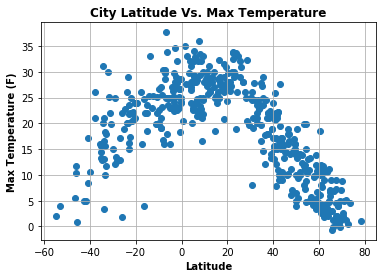

In [68]:
x_values = total_data['Lat']
y_values = total_data['Max Temp']
title = "City Latitude Vs. Max Temperature"
x_label = "Latitude"
y_label = "Max Temperature (F)"
file_name = "fig.1 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Humidity Plot

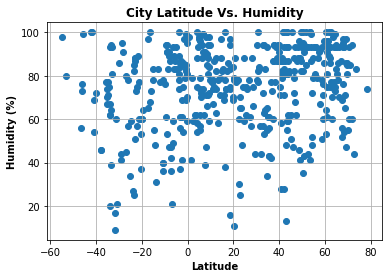

In [69]:
x_values = total_data['Lat']
y_values = total_data['Humidity']
title = "City Latitude Vs. Humidity"
x_label = "Latitude"
y_label = "Humidity (%)"
file_name = "fig.2 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Cloudiness Plot

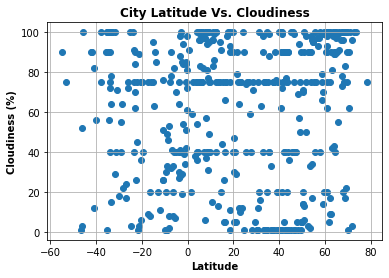

In [70]:
x_values = total_data['Lat']
y_values = total_data['Cloudiness']
title = "City Latitude Vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness (%)"
file_name = "fig.3 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Wind Speed Plot

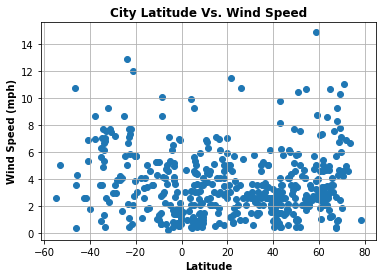

In [71]:
x_values = total_data['Lat']
y_values = total_data['Wind Speed']
title = "City Latitude Vs. Wind Speed"
file_name = "fig.4 - " + title
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

## Linear Regression

In [72]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label):
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation
    plt.annotate(line_eq,(x_values.min(),y_values.min()),
                 fontsize=15,color="firebrick")   
    plt.title(chart_title ,fontweight="bold");
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    # Save Plot
    plt.savefig('Output Data/'+ file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

In [73]:
# Create Northern and Southern Hemisphere DataFrames
total_data_south = total_data.loc[(total_data['Lat'] >= -90) & (total_data['Lat'] <= 0)]
total_data_south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75.0,CL,1.568957e+09,80.0,-53.16,-70.91,4.00,5.10
4,sao jose da coroa grande,1.0,BR,1.568957e+09,91.0,-8.90,-35.15,19.05,0.69
7,ushuaia,90.0,AR,1.568957e+09,98.0,-54.81,-68.31,2.00,2.60
8,rikitea,84.0,PF,1.568957e+09,88.0,-23.12,-134.97,23.55,7.72
12,hermanus,56.0,ZA,1.568957e+09,75.0,-34.42,19.24,20.00,4.92
...,...,...,...,...,...,...,...,...,...
441,kaeo,100.0,NZ,1.568957e+09,74.0,-35.10,173.78,14.44,0.89
448,anori,30.0,BR,1.568957e+09,78.0,-3.74,-61.66,25.15,0.48
452,merauke,46.0,ID,1.568957e+09,83.0,-8.49,140.40,25.55,10.13
456,tiarei,75.0,PF,1.568957e+09,65.0,-17.53,-149.33,26.00,4.10


In [74]:
total_data_north = total_data.loc[(total_data['Lat'] >= 0) & (total_data['Lat'] <= 90)]
total_data_north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,severo-yeniseyskiy,100.0,RU,1.568957e+09,53.0,60.37,93.04,18.55,7.28
2,ilulissat,22.0,GL,1.568957e+09,47.0,69.22,-51.10,1.00,10.30
3,clyde river,90.0,CA,1.568957e+09,93.0,70.47,-68.59,2.00,4.60
5,albany,40.0,US,1.568957e+09,81.0,42.65,-73.75,10.00,0.75
6,flin flon,95.0,CA,1.568957e+09,88.0,54.77,-101.88,10.35,2.46
...,...,...,...,...,...,...,...,...,...
451,son la,29.0,VN,1.568957e+09,77.0,21.32,103.90,26.35,1.22
453,kuytun,17.0,RU,1.568957e+09,52.0,54.34,101.51,19.85,2.81
454,hunsur,40.0,IN,1.568957e+09,74.0,12.30,76.29,26.00,4.60
455,kangaatsiaq,100.0,GL,1.568957e+09,54.0,68.31,-53.46,3.95,4.33


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8803058501529248


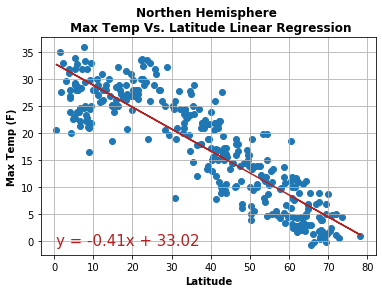

35.95

In [75]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Max Temp"]
chart_title = "Northen Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.5 - Northen Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)
x_values.max()
y_values.max()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.674390924688081


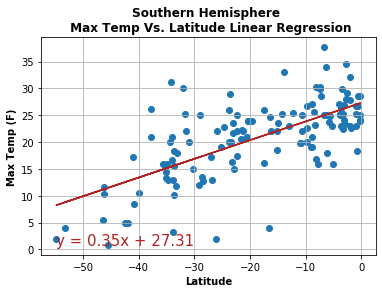

In [76]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Max Temp"]
chart_title = "Southern Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.6 - Southern Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10591020674415863


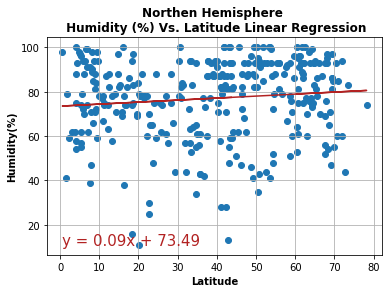

In [77]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Humidity"]
chart_title = "Northen Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.7 - Northen Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08675119577891797


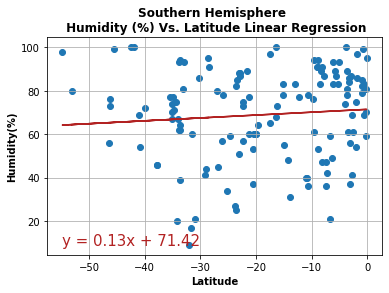

In [78]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Humidity"]
chart_title = "Southern Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.8 - Southern Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05060656679034085


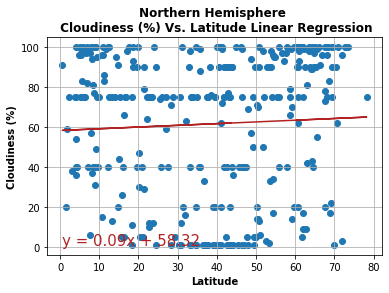

In [79]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Cloudiness"]
chart_title = "Northern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.9 - Northern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.16301595429949542


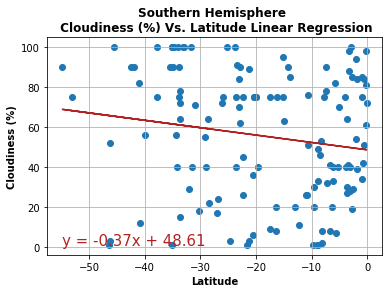

In [80]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Cloudiness"]
chart_title = "Southern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.10 - Southern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1602736001619055


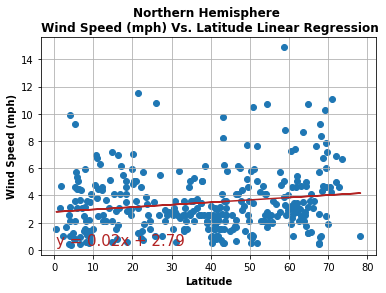

In [81]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Wind Speed"]
chart_title = "Northern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.11 - Northern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2994155263777589


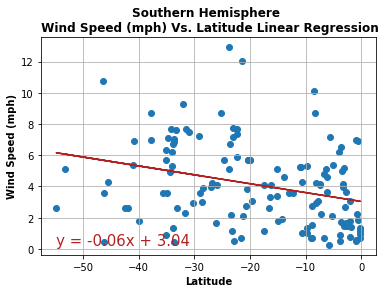

In [82]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Wind Speed"]
chart_title = "Southern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.12 - Southern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label)